## Build a Predictive Maintenance Model for a Delivery Company - Classification

In this project, we are evaluating our data from a competition project organized among students. We are creating a predictive maintenance model for a delivery company. We are testing whether the devices will fail or not. This project is an example of classification. Our metrics are accuracy score, f1 score, precision and recall. Since our data set is an unbalanced data set, we will use the smote technique to balance it.

SMOTE (Synthetic Minority Over-sampling Technique) is a popular data augmentation technique used to address the class imbalance problem. Class imbalance occurs when one class in the dataset has significantly fewer examples than the other classes.

SMOTE generates synthetic examples of the minority class to increase the representation of the minority class, thereby improving the balance between the classes.

<img src='smote.jpg' width=600>

### Import Packages 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('failure.csv')
#Reading our file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


<Axes: >

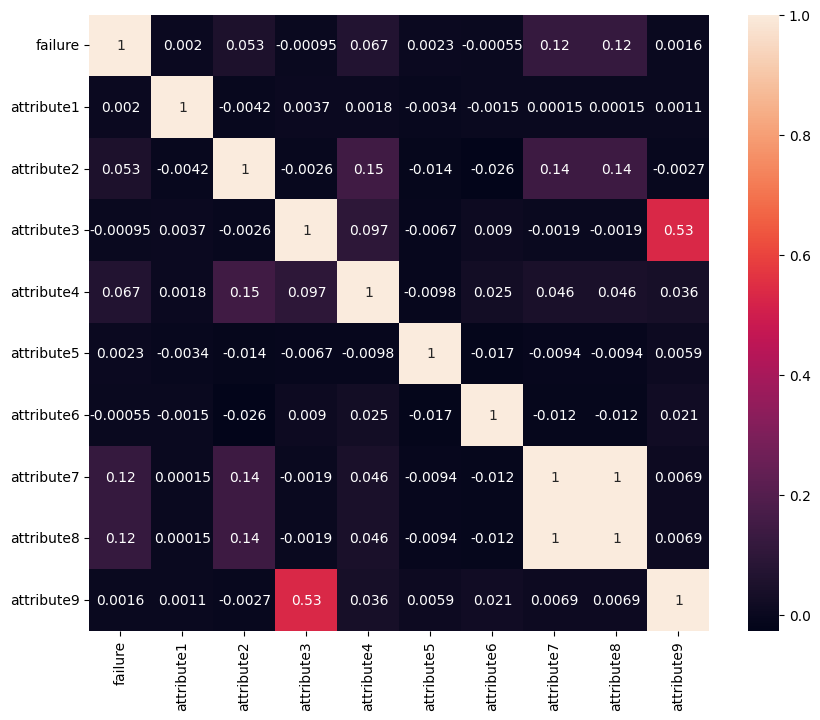

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Feature Engineering

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [10]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015


In [11]:
df.drop(['date'], axis=1,inplace=True)

In [12]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015


In [13]:
df['failure'].unique()

array([0, 1], dtype=int64)

In [14]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

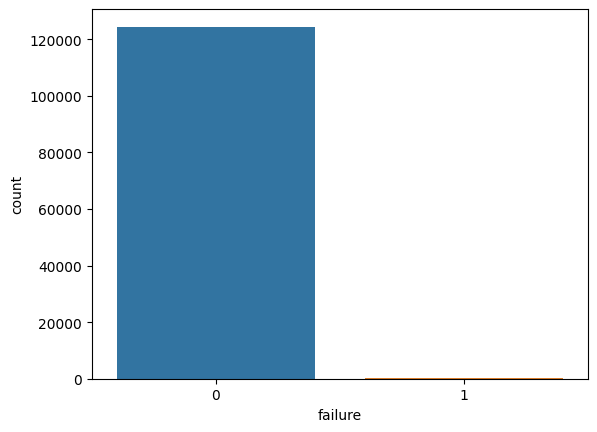

In [15]:
sns.countplot(x=df['failure']);

In [16]:
df['device'].unique()

array(['S1F01085', 'S1F0166B', 'S1F01E6Y', ..., 'S1F02W1L', 'S1F02XLX',
       'S1F03499'], dtype=object)

In [17]:
df['device'].nunique()

1168

In [18]:
df['device']=df['device'].str[:4]

In [19]:
df['device'].value_counts()

device
S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

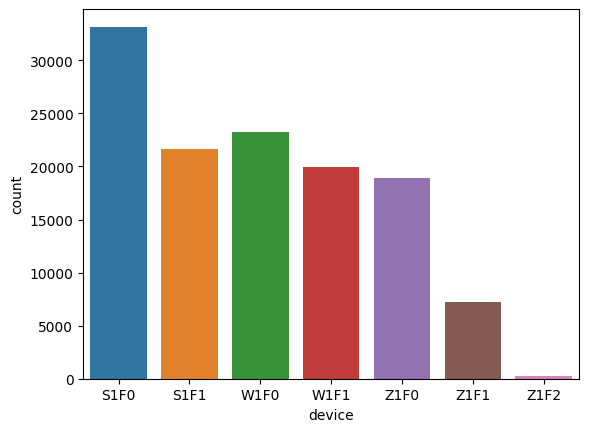

In [20]:
sns.countplot(x=df['device']);

In [21]:
df.sample(5)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
55585,S1F1,0,160734456,0,0,0,10,424241,0,0,0,17,3,2015
26624,S1F0,0,106244376,0,1,0,7,272890,0,0,7,3,2,2015
110855,W1F0,0,218961888,0,0,0,13,207509,0,0,0,7,8,2015
40939,W1F1,0,243462288,8,0,0,10,29,0,0,0,23,2,2015
97823,Z1F1,0,225072904,0,0,0,7,236152,0,0,0,29,6,2015


In [22]:
df['day'].value_counts()

day
1     4742
2     4742
5     4706
4     4705
3     4677
6     4641
7     4345
8     4263
9     4263
10    4262
11    4261
12    4217
13    4154
14    4110
16    4076
15    4076
17    4033
18    3989
19    3981
20    3939
21    3894
22    3893
23    3850
24    3812
25    3806
26    3728
27    3726
28    3622
29    2948
30    2945
31    2088
Name: count, dtype: int64

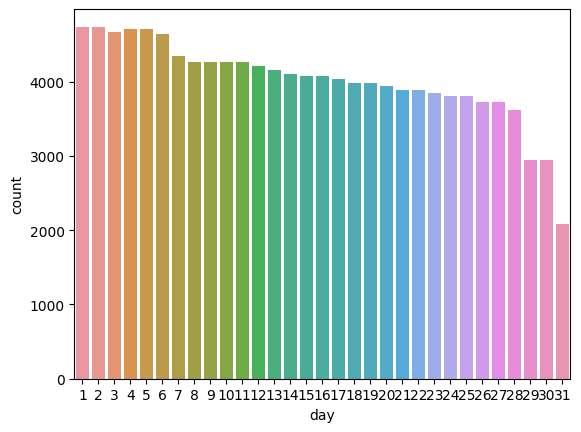

In [23]:
sns.countplot(x=df['day']);

In [24]:
df['month'].value_counts()

month
1     25032
3     19833
2     19500
4     12012
5     11330
7     10531
6     10469
8      8346
9      4470
10     2940
11       31
Name: count, dtype: int64

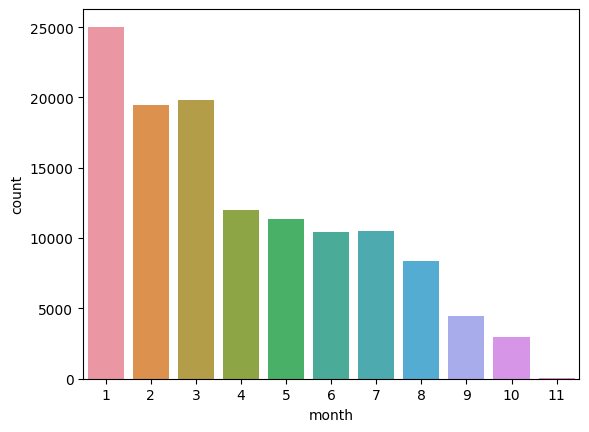

In [25]:
sns.countplot(x=df['month']);

In [26]:
df['year'].value_counts()

year
2015    124494
Name: count, dtype: int64

### Modelling

In [27]:
x=df.drop('failure',axis=1)
y=df[['failure']]

In [28]:
x=pd.get_dummies(x, drop_first=True)

In [29]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [32]:
l=LogisticRegression()
model=l.fit(x_train,y_train)

In [33]:
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.7808505506873543

In [34]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     33564
           1       0.61      0.94      0.74     16192

    accuracy                           0.78     49756
   macro avg       0.78      0.82      0.77     49756
weighted avg       0.84      0.78      0.79     49756



In [35]:
confusion_matrix(lpred, y_test)

array([[23706,  9858],
       [ 1046, 15146]], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def classification(x, y):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Define the classification algorithms
    algorithms = [
        GaussianNB(),
        BernoulliNB(),
        KNeighborsClassifier(),
        SVC(kernel='rbf'),
        DecisionTreeClassifier(),
        LogisticRegression(),
        GradientBoostingClassifier(),
        MultinomialNB(),
        RandomForestClassifier(),
        AdaBoostClassifier()
    ]

    algorithm_names = [
        'Gaussian NB',
        'Bernoulli NB',
        'KNeighbors',
        'SVC',
        'Decision Tree',
        'Logistic Regression',
        'Gradient Boosting',
        'Multinomial NB',
        'Random Forest',
        'AdaBoost'
    ]

    # Initialize the result DataFrame
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algorithm_names)

    # Iterate through the algorithms and evaluate their performance
    for i, algo in enumerate(algorithms):
        # Undersample the training data to handle imbalance
        rus = RandomUnderSampler(random_state=42)
        x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

        # Train the model and make predictions
        algo.fit(x_train_rus, y_train_rus)
        y_pred = algo.predict(x_test)

        # Calculate the evaluation metrics
        result[algorithm_names[i], 'Accuracy'] = accuracy_score(y_test, y_pred)
        result[algorithm_names[i], 'Precision'] = precision_score(y_test, y_pred)
        result[algorithm_names[i], 'Recall'] = recall_score(y_test, y_pred)
        result[algorithm_names[i], 'F1-score'] = f1_score(y_test, y_pred)

    # Sort the result DataFrame by accuracy score in descending order
    return result.sort_values('Accuracy', ascending=False)


result = classification(x, y)
print(result)

In [37]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [38]:
d=DecisionTreeClassifier()

d.fit(x_train,y_train)

dpred=d.predict(x_test)

accuracy_score(dpred,y_test)

0.9986534287322132

In [39]:
print(classification_report(dpred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24729
           1       1.00      1.00      1.00     25027

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



In [40]:
confusion_matrix(dpred, y_test)

array([[24707,    22],
       [   45, 24982]], dtype=int64)

In [41]:
b=BernoulliNB()
model=b.fit(x_train,y_train)
bpred=model.predict(x_test)
accuracy_score(bpred,y_test)

0.9240895570383472

In [42]:
print(classification_report(bpred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     26903
           1       0.88      0.96      0.92     22853

    accuracy                           0.92     49756
   macro avg       0.92      0.93      0.92     49756
weighted avg       0.93      0.92      0.92     49756



In [43]:
confusion_matrix(bpred, y_test)

array([[23939,  2964],
       [  813, 22040]], dtype=int64)

In [44]:
nb=MultinomialNB()
model=nb.fit(x_train,y_train)
nbpred=model.predict(x_test)
accuracy_score(nbpred,y_test)

0.6121472787201544

In [45]:
print(classification_report(nbpred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65     30224
           1       0.50      0.65      0.57     19532

    accuracy                           0.61     49756
   macro avg       0.61      0.62      0.61     49756
weighted avg       0.64      0.61      0.62     49756



In [46]:
confusion_matrix(nbpred, y_test)

array([[17839, 12385],
       [ 6913, 12619]], dtype=int64)

In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
accuracy_score(rfpred,y_test)

0.9995779403489027

Because our data was unbalanced, our success rate before SMOTE was around 99 percent. After SMOTE, it dropped to around 70 percent.